# Outlier Detection

#### Outlier detection is explored here with the help of StudentsPerformance.csv dataset. The methods applied are box plot, interquartile range ,standard deviation, z score and Isolation Forest

In [1]:
#Importing libraries
import pandas as pd
data=pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:>

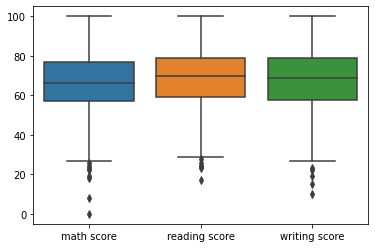

In [3]:
#Box plot of reading score,writing score and math score
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)

Text(0, 0.5, 'writing score')

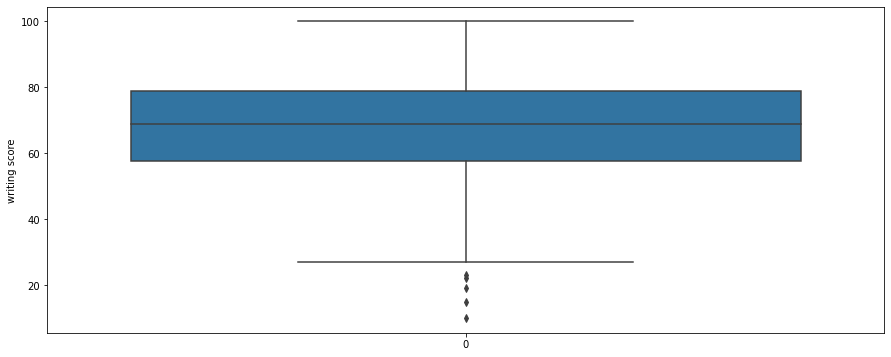

In [4]:
#Box plot of writing score alone
plt.figure(figsize=(15,6))
sns.boxplot(data=data["writing score"])
plt.ylabel("writing score")

###### We can see some outlier points in box plot which is approximately 4 points.

In [8]:
#Determining outlier with interquartile range method
import numpy as np
def outlier_iqr(data , column):
    global lower_cut_off,upper_cut_off
    quartlow =np.quantile(data[column], 0.25)
    quarthigh =  np.quantile(data[column], 0.75)
    iqr = quarthigh - quartlow
    cut_off = iqr * 1.5
    lower_cut_off=quartlow - cut_off
    upper_cut_off = quarthigh + cut_off
    df1 = data[data[column] > upper_cut_off]
    df2 = data[data[column] < lower_cut_off]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [9]:
outlier_iqr(data,'writing score')

Total number of outliers are 5


###### With interquartile range we got the number of outliers as 5

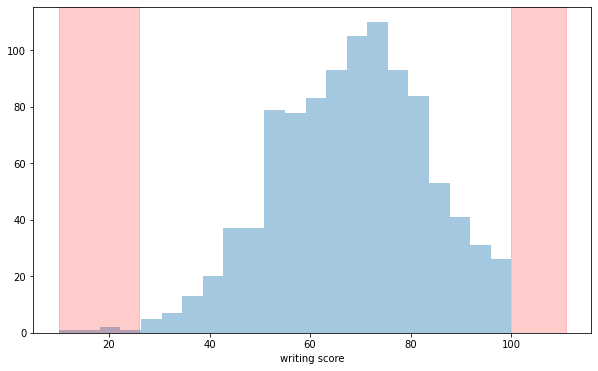

In [13]:
#Visualising the interquartile range results
plt.figure(figsize = (10,6))
sns.distplot(data['writing score'], kde=False)
plt.axvspan(xmin = lower_cut_off,xmax= data['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper_cut_off,xmax= data['writing score'].max(),alpha=0.2, color='red')

###### The red indicate the outliers

<AxesSubplot:xlabel='writing score', ylabel='Density'>

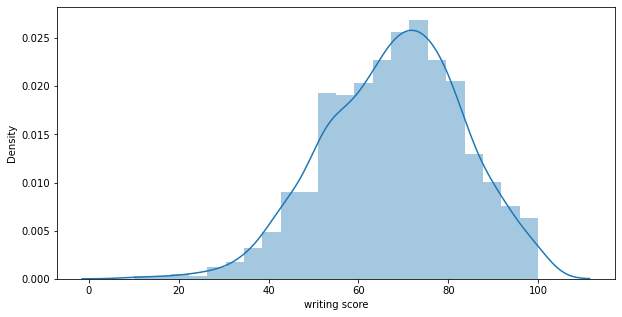

In [14]:
#Density plot
plt.figure(figsize = (10,5))
sns.distplot(data['writing score'])

######  We can see the data is left tailed so, it definitely has outliers

In [15]:
#Determining outliers with standard deviation technique
def outlier_standard_deviation(data, column):
    global lower_cut_off,upper_cut_off
    data_mean =data[column].mean()
    data_std =  data[column].std()
    cut_off = data_std * 3
    lower_cut_off = data_mean - cut_off
    upper_cut_off = data_mean + cut_off
    df1 = data[data[column] > upper_cut_off]
    df2 = data[data[column] < lower_cut_off]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [16]:
outlier_standard_deviation(data,'writing score')

Total number of outliers are 4


###### Here we get the total number of outliers as 4

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


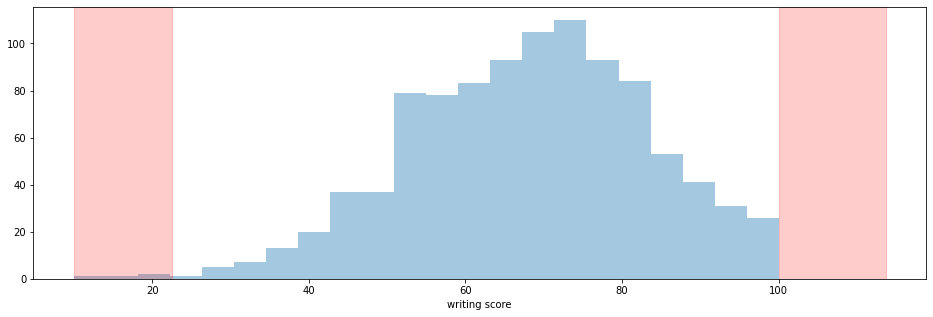

In [17]:
#Visualising the result
plt.figure(figsize = (16,5))
sns.distplot(data['writing score'], kde=False)
plt.axvspan(xmin = lower_cut_off,xmax= data['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper_cut_off,xmax= data['writing score'].max(),alpha=0.2, color='red')

In [18]:
#Outlier detection with zscore method
outliers=[]
def detect_outliers(data):
    global z_score
    z_score=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for i in data:
        zscore= (i - mean)/std 
        z_score.append(zscore)
        if np.abs(zscore) > threshold:
            outliers.append(i)
    return outliers

In [19]:
outlier_pt=detect_outliers(data['writing score'])
print("Total outliers=",len(outlier_pt))

Total outliers= 4


###### This method also gives the total number of outliers as 4 

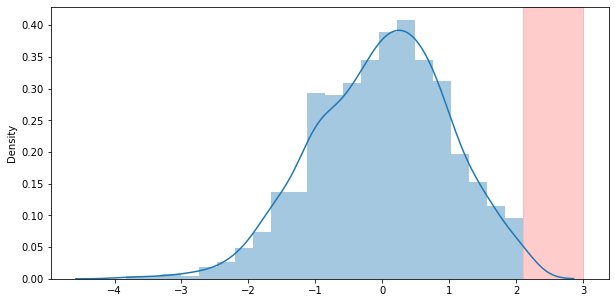

In [20]:
#Visualising the result
plt.figure(figsize = (10,5))
sns.distplot(z_score)
plt.axvspan(xmin = 3 ,xmax= max(z_score),alpha=0.2, color='red')

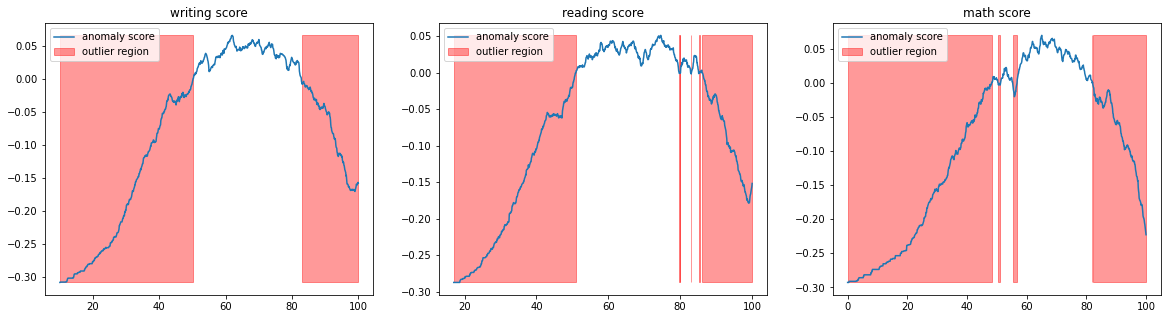

In [31]:
#Displaying outlier region with Isolation forest 
from sklearn.ensemble import IsolationForest
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data[column].values.reshape(-1,1))
    x = np.linspace(data[column].min(), data[column].max(), len(data)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(x)
    outlier = isolation_forest.predict(x)
    axs[i].plot(x, anomaly_score, label='anomaly score')
    axs[i].fill_between(x.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

###### Here we have plotted the outliers for writing score, reading score and math score columns by training the Isolation forest algorithm and have computed the anomaly score for each. Outlier regions corresponds to lower probability areas.